# Prerequisites

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from models import *

Populating the interactive namespace from numpy and matplotlib


/home/mdindin/Project_Dyskinesia/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


# [Data Set](http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions) Description

The experiments were carried out with a group of 30 volunteers within an age bracket of 19-48 years. 
They performed a protocol of activities composed of six basic activities: three static postures (standing, sitting, lying) and three dynamic activities (walking, walking downstairs and walking upstairs). 
The experiment also included postural transitions that occurred between the static postures. These are: stand-to-sit, sit-to-stand, sit-to-lie, lie-to-sit, stand-to-lie, and lie-to-stand.

All the participants were wearing a smartphone (Samsung Galaxy S II) on the waist during the experiment execution. 
We captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz using the embedded accelerometer and gyroscope of the device. 
The experiments were video-recorded to label the data manually. The obtained dataset was randomly partitioned into two sets, where 70 percents of the volunteers was selected for generating the training data and 30 percents the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). 
The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. 
The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used.
From each window, a vector of 561 features was obtained by calculating variables from the time and frequency domain.

In [2]:
with open('activity_labels.txt', 'r') as raw : res = raw.readlines()
activities = []
for ele in res : activities.append(ele.split(' ')[1])

### First observation on Method

Since I use both the features and the raw signals, I tried to link both thanks to the explanations given in the introduction. Since the explanations are kinda clear, a simple check-out is enough to verify whether the features were extracted this way, to make sure both the raw signals and the features match together. We are then good to go !

In [3]:
fea = Loader().load_fea()
des = Loader().load_signals().description

100%|██████████| 62/62 [00:02<00:00, 20.78it/s]


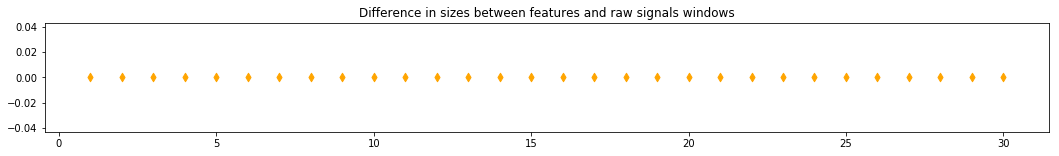

In [4]:
dif = []
for ids in sorted(list(fea.usr_train) + list(fea.usr_valid)) :
    if ids in fea.usr_train : cnt, fts = 0, len(np.where(fea.train['Subjects'] == ids)[0])
    elif ids in fea.usr_valid : cnt, fts = 0, len(np.where(fea.valid['Subjects'] == ids)[0])
    for val in des.query('User == {}'.format(ids)).values :
        cnt += windows(val[-1] - val[-2] + 1, fea.time_window, fea.overlap_rto)
    dif.append(cnt - fts)

plt.figure(figsize=(18,2))
plt.scatter(range(1,31), dif, marker='d', c='orange')
plt.title('Difference in sizes between features and raw signals windows')
plt.show()

# Model based on Features only

Load the given features for visualisation

In [5]:
fea = Loader().load_fea()

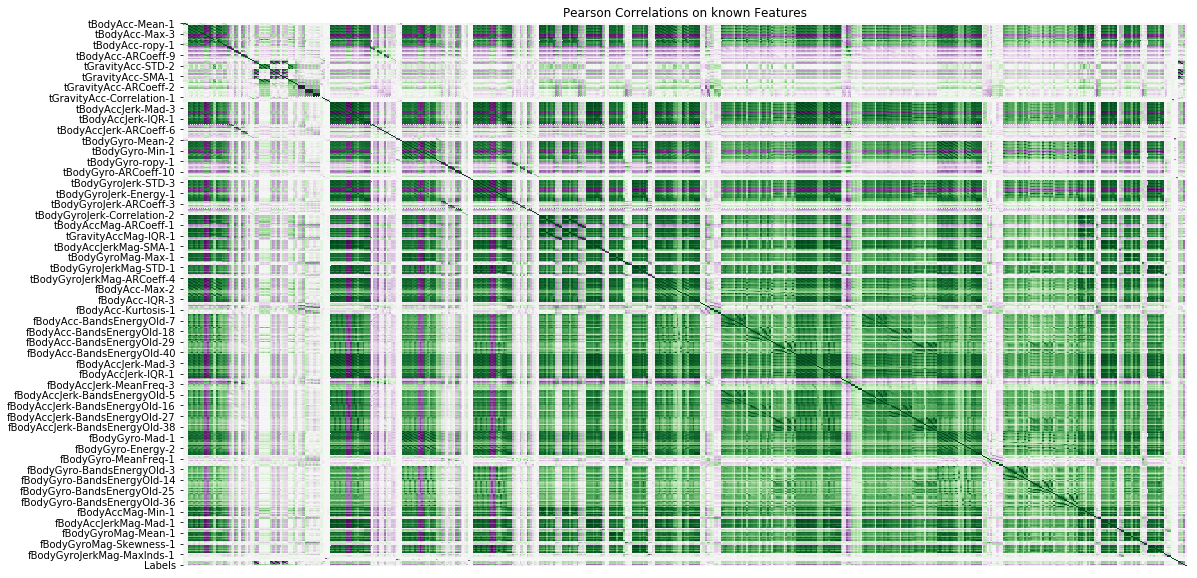

In [6]:
plt.figure(figsize=(18,10))
sb.heatmap(fea.train.corr(), cmap='PRGn', cbar=False, xticklabels=False)
_ = plt.title('Pearson Correlations on known Features')

# Model based on Raw Signals only

In [7]:
raw = Loader().load_raw()

100%|██████████| 9/9 [01:20<00:00,  8.95s/it]


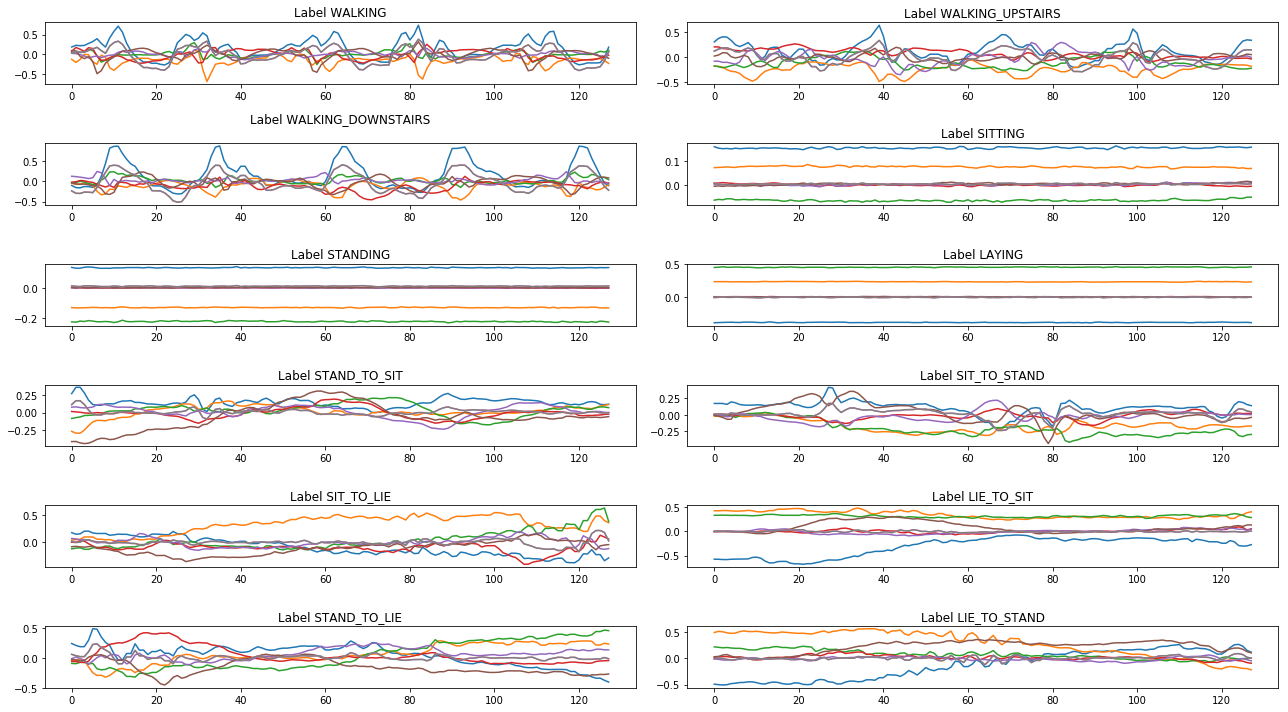

In [8]:
plt.figure(figsize=(18,10))
n_l = len(np.unique(raw.y_tr))
for ind, lab in enumerate(np.unique(raw.y_tr)) :
    plt.subplot((n_l + n_l%2)/2, 2, ind+1)
    plt.title('Label {}'.format(activities[lab]))
    plt.plot(raw.X_tr[np.random.choice(np.where(raw.y_tr == lab)[0])].transpose())
plt.tight_layout()
plt.show() 

# Model based on Raw Signals and Features